# Testing Functions manipulating dataframes

In [206]:
#* for data manipulation 
import pandas as pd 
import numpy as np 

import tiling_disk_plots as tdp
import tiling_disk_utils as tdu

#* for plotting: 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="ticks")
sns.set_context("talk")
%matplotlib inline

def kill_big_outliers(df, mode='z', cut_threshold=100):
    """df as usual, z in µm!!!!
    returns: df with z_clean -> z within +-100µm of mean of each
        hexagon """
    for hexagon in df.hex_nr.unique():
        temp_df = df.loc[df.hex_nr == hexagon,:]
        hex_mean = temp_df[mode].median()
        lower_cut = hex_mean - cut_threshold
        upper_cut = hex_mean + cut_threshold
        print(f'hex_nr = {hexagon}')
        print(f'hex_mean = {hex_mean}')
        print(f'lower_cut = {lower_cut}')
        print(f'upper_cut = {upper_cut}')
        def temp_sort_func(z):
            return  z if lower_cut < z < upper_cut else np.NaN
        df['z_clean'] = df[mode].apply(lambda z: temp_sort_func(z))
    return df 


## curing data

In [88]:
curing_triplets_df = tdu.read_single_measurement('measurements/triplets', '20220414_trip_v7_curing.txt')
# curing_triplets_df = tdu.add_ring_nr_label(curing_triplets_df)
curing_triplets_df = tdu.df_convert_unix_to_datetime(curing_triplets_df)

In [89]:
curing_triplets_df.tail()

,run_nr,hex_nr,point,x,y,z,unix_time,datetime
168473,24,11,60,25.65,-120.26,-156.999,1649990010,2022-04-15 04:33:30+02:00
168474,24,11,60,25.83,-120.44,-156.974,1649990010,2022-04-15 04:33:30+02:00
168475,24,11,60,26.08,-120.51,-156.987,1649990010,2022-04-15 04:33:30+02:00
168476,24,11,60,26.33,-120.44,-156.993,1649990010,2022-04-15 04:33:30+02:00
168477,24,11,60,26.51,-120.26,-156.968,1649990011,2022-04-15 04:33:31+02:00


## test kill outliers

In [325]:
test_df = curing_triplets_df.loc[(curing_triplets_df.run_nr==1) &( (curing_triplets_df.hex_nr == 19) | (curing_triplets_df.hex_nr == 18)),:]

In [326]:
test_col_zero = np.zeros(test_df.z.count()//3 +1)

In [327]:
test_col_101 = np.ones(test_df.z.count()//3 +1)

In [328]:
test_col_25 = np.ones(test_df.z.count()//3 -1) + 24

In [329]:
test_col_101 = (test_col_101 * 100)+1

In [330]:
test_col_101

array([101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 101., 101., 101., 101.,
       101., 101., 101., 101., 101., 101., 101., 10

In [331]:
total_test_col = np.concatenate((test_col_zero, test_col_101, test_col_25) )

In [332]:
total_test_col

array([ 0.,  0.,  0., ..., 25., 25., 25.])

In [333]:
test_df['z_test'] = total_test_col

C:\Users\Domin\AppData\Local\Temp\ipykernel_14568\2456224507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['z_test'] = total_test_col


(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

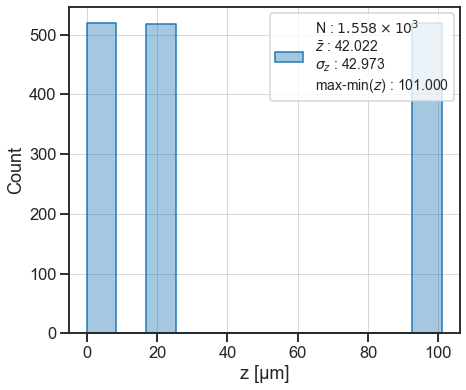

In [334]:
tdp.ts_hist(test_df, 'z_test')

(20.0, 135.0)

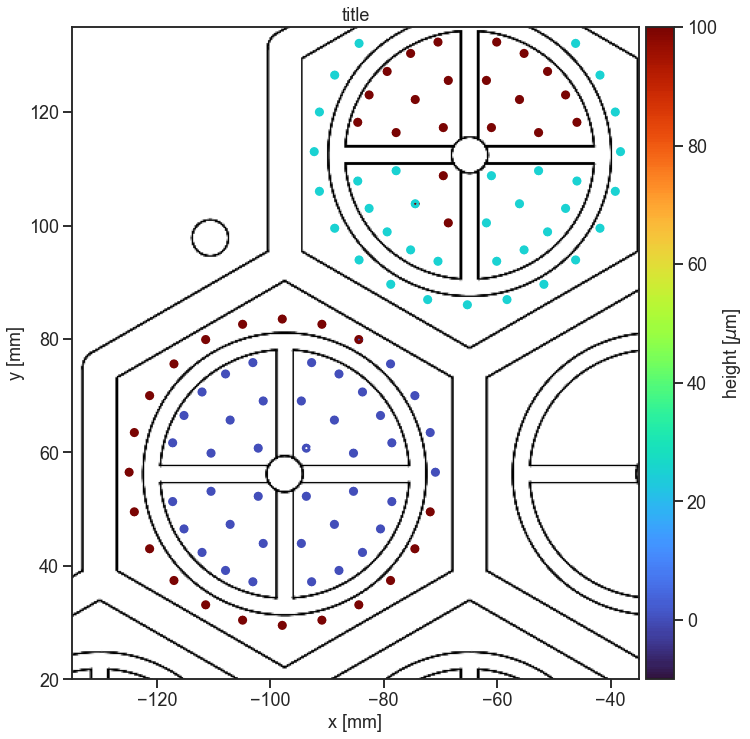

In [335]:
fig, ax = tdp.full_hexagon_plot(test_df, mode='z_test', cbar_norm=(-10, 50, 100), size=4)
ax.set_xlim(-135, -35)
ax.set_ylim(20, 135)

In [336]:
test_df = kill_big_outliers(test_df, mode='z_test', cut_threshold=50)

hex_nr = 19
hex_mean = 0.0
lower_cut = -50.0
upper_cut = 50.0
hex_nr = 18
hex_mean = 25.0
lower_cut = -25.0
upper_cut = 75.0


C:\Users\Domin\AppData\Local\Temp\ipykernel_14568\1425091254.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['z_clean'] = df[mode].apply(lambda z: temp_sort_func(z))


In [337]:
test_df

,run_nr,hex_nr,point,x,y,z,unix_time,datetime,z_clean,z_test
0,1,19,1,-93.20,61.00,-156993.0,1649937420,2022-04-14 13:57:00+02:00,0.0,0.0
1,1,19,1,-93.39,61.19,-157048.0,1649937420,2022-04-14 13:57:00+02:00,0.0,0.0
2,1,19,1,-93.64,61.25,-156956.0,1649937421,2022-04-14 13:57:01+02:00,0.0,0.0
3,1,19,1,-93.89,61.19,-156907.0,1649937421,2022-04-14 13:57:01+02:00,0.0,0.0
4,1,19,1,-94.07,61.00,-157005.0,1649937421,2022-04-14 13:57:01+02:00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1553,1,18,60,-39.60,105.78,-156926.0,1649937898,2022-04-14 14:04:58+02:00,25.0,25.0
1554,1,18,60,-39.42,105.60,-156883.0,1649937899,2022-04-14 14:04:59+02:00,25.0,25.0
1555,1,18,60,-39.17,105.53,-156913.0,1649937899,2022-04-14 14:04:59+02:00,25.0,25.0
1556,1,18,60,-38.92,105.60,-156974.0,1649937899,2022-04-14 14:04:59+02:00,25.0,25.0


In [338]:
test_df.keys()

Index(['run_nr', 'hex_nr', 'point', 'x', 'y', 'z', 'unix_time', 'datetime',
       'z_clean', 'z_test'],
      dtype='object')

(<Figure size 504x432 with 1 Axes>,
 <AxesSubplot:xlabel='z [µm]', ylabel='Count'>)

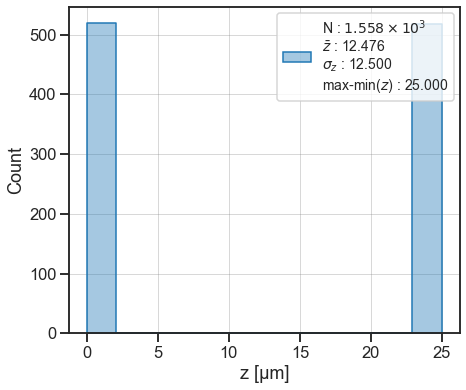

In [339]:
tdp.ts_hist(test_df, mode='z_clean')

(<Figure size 864x864 with 2 Axes>,
 <AxesSubplot:title={'center':'title'}, xlabel='x [mm]', ylabel='y [mm]'>)

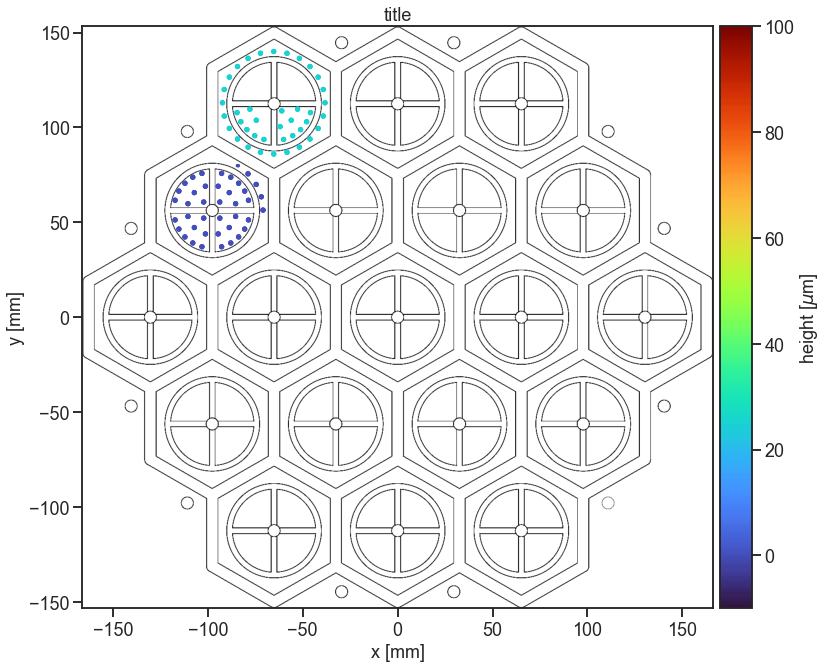

In [340]:
tdp.full_hexagon_plot(test_df, mode='z_clean', cbar_norm=(-10, 50, 100), size=4)